# Problem Statement 

Here we have a dataset of Breast Cancer. The given features are here like size of tumer, lingth of tumer etc. Based on the given dataset we need to predict for a new patient whether his/her tumer is benign or malignant based on the informations of the tumer.

# Importing Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


# Basic Info of Dataset

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
type(cancer)

sklearn.utils.Bunch

No. of column

In [4]:
len(cancer.feature_names)

30

No. of Target values

In [5]:
len(cancer.target_names)

2

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

No. of given examples

In [7]:
len(cancer.target)

569

Shape of the dataset

In [8]:
cancer.data.shape

(569, 30)

***

Counts of target values

In [9]:
import numpy as np
print(cancer.target_names[0], ': ', np.bincount(cancer.target)[0], cancer.target_names[1], ': ', np.bincount(cancer.target)[1])

malignant :  212 benign :  357


***

# Preparing Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Splitting Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

It splits the dataset into train and testset at a ratio of 70% and 30%

***

## Why kNN ?

Here, the dataset is not linear as well as multidimentional (more than 1 features). In these cases, kNN performs better compared to SVM and Logistic Regressions respectively. kNN is faster compared to Logistic Regression, Random Forest etc. Hence we choose kNN algorithm.

## Checking accuracy for different values of k##

In [12]:
training_accuracy = []   # List to hold the Training accuracy
test_accuracy = []       # List to hold the Test accuracy
neighbor_settings = range(1,11)
for n_neighbors in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

In [13]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [14]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

Plotting the train and test accuracy datas

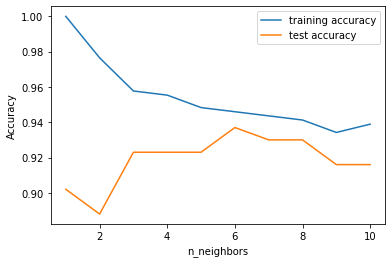

In [15]:
plt.plot(neighbor_settings, training_accuracy, label="training accuracy")
plt.plot(neighbor_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Choosing k-value

Here we can see that for k = 6, the trainset accuracy and testset accuracy are almost similar and both the accuracies are very near about 94%. But we generally don't choose even numbers of neighbour values. Hence we choose k = 7 which has also a very good trainset-testset accuracy pair and k is odd.

In [16]:
clf = KNeighborsClassifier(n_neighbors = 7)  # Taking odd value of k
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

***

# Predicting  a sample data

In [17]:
X_new = np.array([[11.47,20.88,79.58,383.1,0.1475,0.2840,0.2424,0.1025,0.2600,0.09774,0.5056,1.155,3.445,27.27,0.00911,0.07458,0.05665,0.01867,0.05363,0.009808,14.91,26.5,98.89,567.8,0.3000,0.8668,0.6969,0.2575,0.6634,0.173]])

In [18]:
X_new.shape

(1, 30)

In [19]:
prediction = clf.predict(X_new)
prediction

array([1])

# Test Model Score

In [20]:
clf.score(X_train, y_train)

0.9436619718309859

In [21]:
clf.score(X_test, y_test)

0.9300699300699301

# Accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
acc = accuracy_score(y_test, y_pred)
acc

0.9300699300699301